# Python for Data 27: Linear Regression

<br><a href="#linearReg">1. Linear Regression</a>
<br><a href="#linearRegwithOutlier">2. Linear Regression with Outlier</a>
<br><a href="#polyReg">3. Polynomial Regression</a>
<br><a href="#multiReg">4. Multivariate Regression</a>
<br><a href="#lassoReg">5. LASSO Regression</a>
<br><a href="#ridgeReg">6. RIDGE Regression</a>
<br><a href="#assumptions">6. Assumptions of linear regression in detail</a>

**Predictive modeling** using a data samples to make predictions about unseen data, such as data that has yet to be generated.

# <a id="linearReg">1. Linear Regression</a>



Linear regression is a predictive modeling technique for predicting a real number response variable based on one or more explanatory variables. 
- The term "regression" in predictive modeling generally refers to any modeling task that involves predicting a real number (as opposed classification, which involves predicting a category or class.). 
- The term "linear" in the name linear regression refers to the fact that the method models data with linear combination of the explanatory variables. 
- linear regression in its most basic form fits a straight line to the response variable that minimizes the squared differences (also called errors or residuals.).
- It is most effective in cases where the response and explanatory variable have a linear relationship.

$$response = intercept + constant ∗ explanatory$$



<br><a href="#loaddata">- Load Dataset</a>
<br><a href="#trainlinerReg">- Train the linear regression model</a>
<br><a href="#plotlinereg">- Plot Regression Line</a>
<br><a href="#eval">- Evaluation the linear model</a>

---
#### Setup and load dependencies

In [2]:
# Import libraries
import os
import numpy as np

import statsmodels.api as sm
from statsmodels.stats.power import TTestIndPower, TTestPower
from statsmodels.compat import lzip
from scipy.stats import skew, norm, kurtosis
from scipy import stats 

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [3]:
import warnings
from sklearn.exceptions import ConvergenceWarning
warnings.filterwarnings("ignore", category=ConvergenceWarning)

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "last_expr"
# InteractiveShell.ast_node_interactivity = 'last_expr'

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

plt.rcParams['figure.figsize'] = (7, 6)
colors = sns.cubehelix_palette(20,reverse = True, light= 0.01,dark = 0.5, gamma= 0.7)
sns.set_context('talk')
sns.set(style="whitegrid")
sns.set_palette(palette= sns.color_palette("RdBu",20))

In [5]:
import pandas as pd

# use the following to suppress scientific notation in Pandas
pd.set_option('display.float_format', lambda x: '%.3f' % x)
# Set the maximum number of rows and columns to display
pd.set_option('display.max_rows', 10)
pd.set_option('display.max_columns', 100)

## <a id="loaddata">Load Dataset</a>

In [5]:
# Load mtcars data set
mtcars = pd.read_csv("../input/mtcars/mtcars.csv")
mtcars.head(5)

,Unnamed: 0,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.000,6,160.000,110,3.900,2.620,16.460,0,1,4,4
1,Mazda RX4 Wag,21.000,6,160.000,110,3.900,2.875,17.020,0,1,4,4
2,Datsun 710,22.800,4,108.000,93,3.850,2.320,18.610,1,1,4,1
3,Hornet 4 Drive,21.400,6,258.000,110,3.080,3.215,19.440,1,0,3,1
4,Hornet Sportabout,18.700,8,360.000,175,3.150,3.440,17.020,0,0,3,2


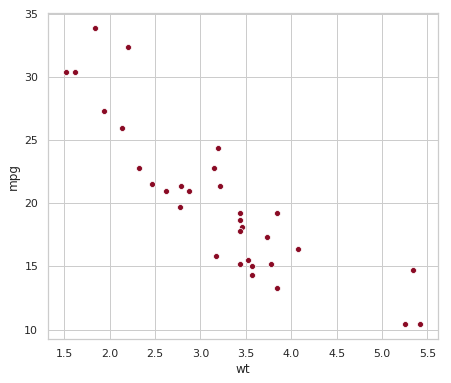

In [6]:
sns.scatterplot(data = mtcars,x='wt', y='mpg' );

> The scatterplot shows a roughly linear relationship between weight and mpg, suggesting a linear regression model might work well.

## <a id="trainlinerReg">Train the linear regression model</a>

In [7]:
# Initialize model
reg_model = LinearRegression()

# Train the model using the mtcars data
X = mtcars[['wt']]
y = mtcars['mpg']
reg_model.fit(X=X, y=y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [8]:
# Check trained model coefficients
reg_model.intercept_, reg_model.coef_[0]

(37.28512616734204, -5.344471572722678)

The output above shows the model intercept and coefficients used to create the best fit line. 
- The y-intercept term is set to 37.2851.
- The coefficient for the weight variable is -5.3445. 
- In other words, the model fit the line: $mpg = 37.2851 - 5.3445 * wt$.

## <a id="plotlinereg">Plot Regression Line</a>


/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


(0, 7)

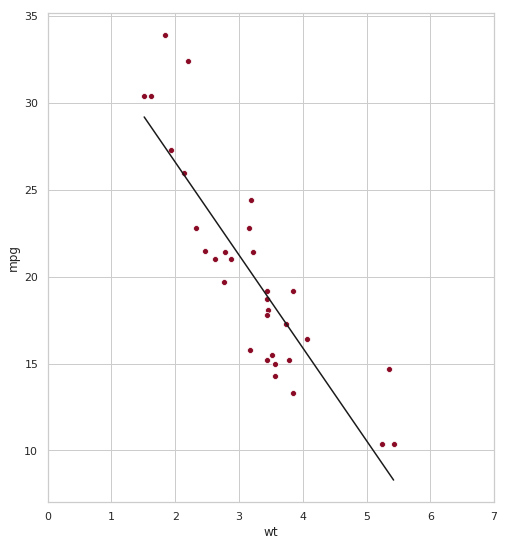

In [9]:
train_preds = reg_model.predict(X)
plt.figure(figsize=(8,9))

# plot data points
sns.scatterplot(data=mtcars, x='wt', y='mpg')

# Plot regression line
sns.lineplot(x=mtcars['wt'], y=train_preds, color='k')
plt.xlim(0,7)

## <a id="eval">Evaluation the linear model</a>

#### **1. squared**
A value that ranges from 0 to 1 which describes the proportion of variance in the response variable that is explained by the model. 
- In this case, car weight explains roughly 75% of the variance in mpg.

<img src="https://miro.medium.com/v2/resize:fit:1400/1*_HbrAW-tMRBli6ASD5Bttw.png" width = 500>
- SSRes is the sum of the square residuals and SSTot is the sum of the squares of the difference between each data point and the mean of the data. 

#### **2. Adjusted R-squared**
A modified version of R-squared that has been adjusted for the number of predictors in the model. Better multivariate linear regression.

<img src="https://miro.medium.com/v2/resize:fit:1024/1*kW2xSxbIb7laGRoEcgx8vg.jpeg" width = 500>

#### **3. Root mean squared error (RMSE)**
<img src="https://miro.medium.com/v2/resize:fit:966/1*lqDsPkfXPGen32Uem1PTNg.png" width = 300>



#### We could calculate R-squared by hand like this:


In [10]:
train_preds = reg_model.predict(X = X)

# Actual - prediction = residuals
residuals = (mtcars["mpg"] - train_preds)**2
var = (mtcars["mpg"] - mtcars["mpg"].mean())**2

SSR = sum(residuals)
SST = sum(var)
R_square = 1- (SSR/SST)
R_square

0.7528327936582646

#### Or we could calculate R-squared by sickit-learn:


In [11]:
# R-squared
# r2 = r2_score()
# or 
r2 = reg_model.score(X = X,  y = y)
print("R-square: ", r2)

Adj_r2 = 1 - (1-r2) * (len(y)-1)/(len(y)-X.shape[1]-1)
print("Adjusted R-square: ", Adj_r2)

rmse = np.sqrt(np.mean((y- reg_model.predict(X = X))**2))
# or 
# RMSE = mean_squared_error(reg_model.predict(X = X),y)**0.5
print("RMSE: ", rmse)

R-square:  0.7528327936582646
Adjusted R-square:  0.7445938867802068
RMSE:  2.949162685955028


---
# <a id="linearRegwithOutlier">2. Linear Regression with Outlier</a>
---


### Add an outlier to the data and create linear regression model

Let's add an outlier, a super heavy fuel efficient car and plot a new regression model.
- The regression line looks like a reasonable fit and it follows our intuition: as car weight increases we would expect fuel economy to decline.
- **Outliers can have a large influence on linear regression models**: since regression deals with minimizing squared residuals, large residuals have a disproportionately large influence on the model. 


In [12]:
mtcars_subset = mtcars[["mpg","wt"]]
super_car = pd.DataFrame({"mpg":50,"wt":10}, index=["super"])
new_cars = mtcars_subset.append(super_car)
X = new_cars[["wt"]]
y = new_cars["mpg"]

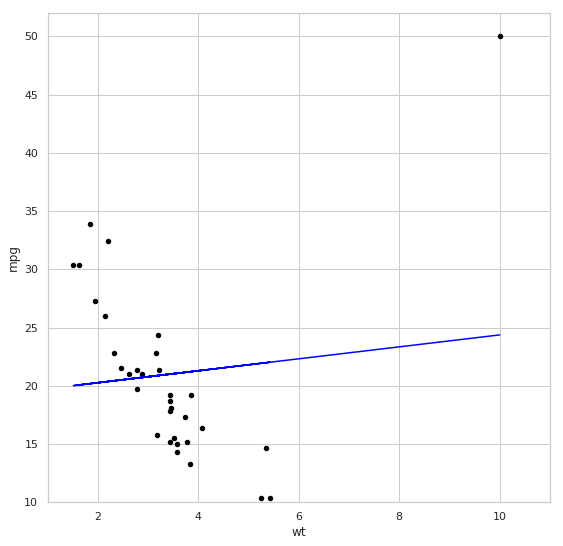

In [13]:
# Initialize model
reg_model = LinearRegression()

# Train the model using the new_cars data
reg_model.fit(X = X, y = y)

train_prediction2 = reg_model.predict(X = X)

# Plot the new model
new_cars.plot(kind="scatter",
           x="wt",
           y="mpg",
           figsize=(9,9),
           color="black", xlim=(1,11), ylim=(10,52))

# Plot regression line
plt.plot(new_cars["wt"],     # Explanatory variable
         train_prediction2,  # Predicted values
         color="blue");

---
# <a id="polyReg">3. Polynomial Regression</a>
---

Variables often exhibit non-linear relationships that can't be fit well with a straight line. In these cases, we can use linear regression to fit a curved line the data by adding extra higher order terms (squared, cubic, etc.) to the model. A linear regression that involves higher order terms is known as "polynomial regression."

In [14]:
# Initialize model
poly_model = LinearRegression()

# Make a DataFrame of predictor variables
X = pd.DataFrame([mtcars["wt"],           # Include weight
                  mtcars["wt"]**2]).T     # Include weight squared
y = mtcars["mpg"]

# Train the model using the new_cars data
poly_model.fit(X = X, y = y)

# Check trained model y-intercept
print("Model intercept: ", poly_model.intercept_)

# Check trained model coefficients (scaling factor given to "wt")
print("Model Coefficients: ", poly_model.coef_)

Model intercept:  49.93081094945181
Model Coefficients:  [-13.38033708   1.17108689]


In [15]:
# R-squared
r2 = r2_score(y, poly_model.predict(X = X))
# or 
# r2 = poly_model.score(X = X,  y = y)
print("R-square: ", r2)

Adj_r2 = 1 - (1-r2) * (len(y)-1)/(len(y)-X.shape[1]-1)
print("Adjusted R-square: ", Adj_r2)

# or 
# rmse = np.sqrt(np.mean((y- poly_model.predict(X = X))**2))

rmse = mean_squared_error(poly_model.predict(X = X),y)**0.5
print("RMSE: ", rmse)

R-square:  0.8190613581384095
Adjusted R-square:  0.8065828311134723
RMSE:  2.5233004724610786


The output shows us that including the weight squared term appears to improve the model's performance because:
- The R-squared increased from 0.75 to 0.8190. 
- It should be noted, however, that adding more variables to a linear regression model can never cause R-squared to decrease, so we only want to add variables if there is a substantial improvement in performance.

Since the RMSE of the quadratic model is lower than the old one and the adjusted R-squared is higher, it is probably a better model however, have to be careful about overfitting the training data.

- Overfitting describes a situation where our model fits the data we use to create it (training data) too closely, resulting in poor generalization to new data. 
- This is why we generally don't want to use training data to evaluate a model: it gives us an optimistic evaluation. 
- One of the strengths of first and second order linear regression is that they are so simple, they are unlikely to overfit data very much.
- The more complex the model we create and the more freedom it has to fit the training data, the greater risk we run of overfitting. 
> We could keep including more polynomial terms in our regression model to fit the training data more closely and achieve lower RMSE scores against the training set, but this would almost certainly not generalize well to new data.

## Testing polynomial model on unseen data

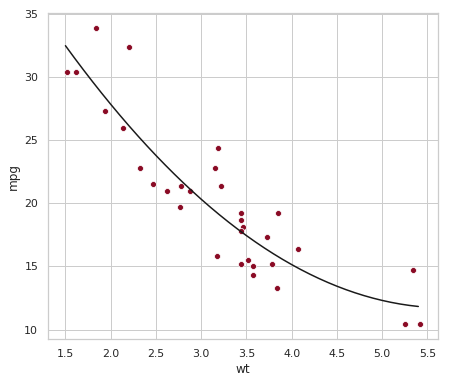

In [16]:
# Plot the curve from 1.5 to 5.5
poly_line_range = np.arange(1.5, 5.5, 0.1)

# Get first and second order predictors from range
poly_predictors = pd.DataFrame([poly_line_range, poly_line_range**2]).T

# Get corresponding y values from the model
y_values = poly_model.predict(X = poly_predictors)

sns.scatterplot(data = mtcars, x="wt", y="mpg")
# Plot curve line
plt.plot(poly_line_range,   # X-axis range
         y_values,          # Predicted values
         color="k");

> The quadratic function seems to fit the data a little better than the linear one. 

In [17]:
# Initialize model
poly_model = LinearRegression()

# Make a DataFrame of predictor variables
X = pd.DataFrame([ mtcars["wt"],           
                   mtcars["wt"]**2,
                   mtcars["wt"]**3,
                   mtcars["wt"]**4,
                   mtcars["wt"]**5,
                   mtcars["wt"]**6,
                   mtcars["wt"]**7,
                   mtcars["wt"]**8,
                   mtcars["wt"]**9,
                   mtcars["wt"]**10]).T     

# Train the model using the new_cars data
poly_model.fit(X = X, y =y)

# Check trained model y-intercept
print("Model intercept: ", poly_model.intercept_)

# Check trained model coefficients (scaling factor given to "wt")
print("Model Coefficients: ", poly_model.coef_)

Model intercept:  -14921.120647946558
Model Coefficients:  [ 6.45813583e+04 -1.20086135e+05  1.26931932e+05 -8.46598480e+04
  3.73155209e+04 -1.10334758e+04  2.16590409e+03 -2.70730550e+02
  1.94974165e+01 -6.15515447e-01]


In [18]:
# R-squared
r2 = r2_score(y, poly_model.predict(X = X))
# or 
# r2 = poly_model.score(X = X,  y = y)
print("R-square: ", r2)

Adj_r2 = 1 - (1-r2) * (len(y)-1)/(len(y)-X.shape[1]-1)
print("Adjusted R-square: ", Adj_r2)

# or 
# rmse = np.sqrt(np.mean((y- poly_model.predict(X = X))**2))

rmse = mean_squared_error(poly_model.predict(X = X),y)**0.5
print("RMSE: ", rmse)

R-square:  0.8702106585933677
Adjusted R-square:  0.8084062103044951
RMSE:  2.13709004006043


Notice the R-squared score has increased substantially from our quadratic model.

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


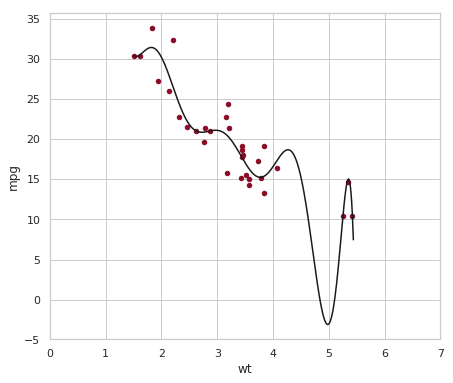

In [19]:
p_range = np.arange(1.5, 5.45, 0.01)

poly_predictors = pd.DataFrame([p_range, p_range**2, p_range**3,
                              p_range**4, p_range**5, p_range**6, p_range**7, 
                              p_range**8, p_range**9, p_range**10]).T  

# Get corresponding y values from the model
y_values = poly_model.predict(X = poly_predictors)

mtcars.plot(kind="scatter",
           x="wt",
           y="mpg",
           xlim = (0,7))

# Plot curve line
plt.plot(p_range,           # X-axis range
         y_values,          # Predicted values
         color="k");

Notice how the 10th order polynomial model curves wildly in some places to fit the training data. While this model happens to yield a closer fit to the training data, 
- It will almost certainly fail to generalize well to new data as it leads to absurd predictions such as a car having less than **0 mpg** if it weighs **5000lbs**.

---
# <a id="multiReg">4. Multivariate Regression</a>
---

When faced with a predictive modeling task, you'll often have several variables in your data that may help explain variation in the response variable. You can include more explanatory variables in a linear regression model by including more columns in the data frame you pass to the model training function. Let's make a new model that adds the horsepower variable to our original model:

In [20]:
# data 
X = mtcars[["wt","hp"]]
y = mtcars["mpg"]

# Initialize model
multi_reg_model = LinearRegression()

# Train the model using the mtcars data
multi_reg_model.fit(X = X, y = y)

# Check trained model y-intercept
print("Intercept: ", multi_reg_model.intercept_)
# Check trained model coefficients (scaling factor given to "wt")
print("Coefficients: ", multi_reg_model.coef_)

Intercept:  37.22727011644721
Coefficients:  [-3.87783074 -0.03177295]


In [21]:
y_pred = multi_reg_model.predict(X = X)

# R-squared
r2 = r2_score(y, y_pred)
print("R-square: ", r2)

Adj_r2 = 1 - (1-r2) * (len(y)-1)/(len(y)-X.shape[1]-1)
print("Adjusted R-square: ", Adj_r2)

rmse = mean_squared_error(y_pred,y)**0.5
print("RMSE: ", rmse)

R-square:  0.8267854518827914
Adjusted R-square:  0.8148396209781563
RMSE:  2.4688544581791


The improved R-squared score suggests horsepower has a linear relationship with mpg. Let's investigate with a plot:

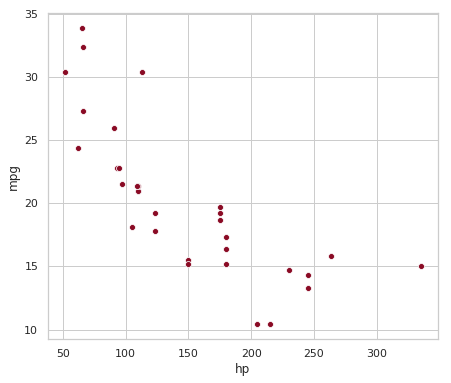

In [22]:
sns.scatterplot(data = mtcars,x="hp", y="mpg");

> While mpg does tend to decline with horsepower, the relationship appears more curved than linear so adding polynomial terms to our multiple regression model could yield a better fit.

In [23]:
# Initialize model
multi_reg_model = LinearRegression()

# Include squared terms
X = pd.DataFrame([mtcars["wt"],
                  mtcars["hp"],
                  mtcars["wt"]**2,
                  mtcars["hp"]**2]).T

# Train the model using the mtcars data
multi_reg_model.fit(X = X, y = y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [24]:
y_pred = multi_reg_model.predict(X = X)

# R-squared
r2 = r2_score(y, y_pred)
print("R-square: ", r2)

Adj_r2 = 1 - (1-r2) * (len(y)-1)/(len(y)-X.shape[1]-1)
print("Adjusted R-square: ", Adj_r2)

rmse = mean_squared_error(y_pred,y)**0.5
print("RMSE: ", rmse)

R-square:  0.8907279549670641
Adjusted R-square:  0.8745395038510737
RMSE:  1.9609108134176985


The new R-squared and lower RMSE suggest this is a better model than any we made previously and we wouldn't be too concerned about overfitting since it only includes 2 variables and 2 squared terms. 
> Note that when working with multidimensional models, it becomes difficult to visualize results, so you rely heavily on numeric output.

---
# <a id="assumptions">5. Assumptions of linear regression in detail</a>
---

<br><a href="#linearity">1. Linearity</a>
<br><a href="#normal">2. Check for Normality of error terms/residuals</a>
<br><a href="#auto">3. No autocorrelation of residuals</a>
<br><a href="#multico">4. No perfect multicollinearity</a>
<br><a href="#hetro">5. Check for Homoscedasticity</a>

In [7]:
ad_data = pd.read_csv('../input/ISLR-Auto/Advertising.csv',index_col='Unnamed: 0')
ad_data.describe()

,TV,Radio,Newspaper,Sales
count,200.000,200.000,200.000,200.000
mean,147.042,23.264,30.554,14.023
std,85.854,14.847,21.779,5.217
min,0.700,0.000,0.300,1.600
25%,74.375,9.975,12.750,10.375
50%,149.750,22.900,25.750,12.900
75%,218.825,36.525,45.100,17.400
max,296.400,49.600,114.000,27.000


## <a id="linearity">1. Linearity</a>


/opt/conda/lib/python3.6/site-packages/seaborn/axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


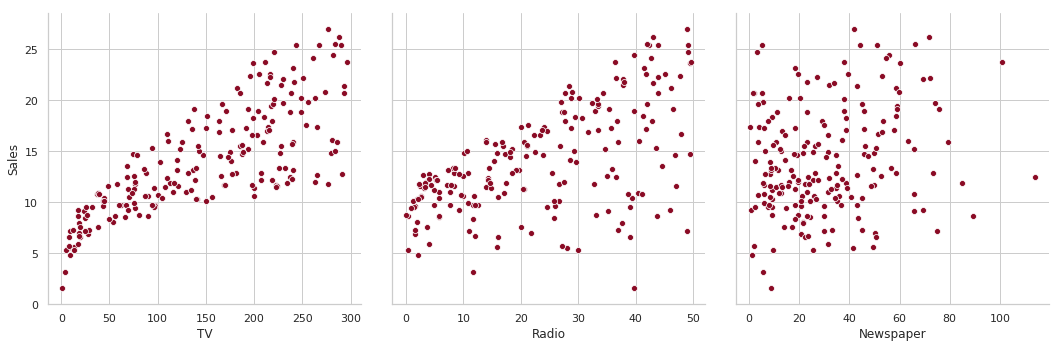

In [8]:
# visualize the relationship between the features and the response using scatterplots
p = sns.pairplot(ad_data, x_vars=['TV','Radio','Newspaper'], y_vars='Sales', size=5)

- None of the independent variables form an accurately linear shape
- So it shows that a linear model might not be able to efficiently explain the data in terms of variability, prediction accuracy etc.
- Use polynomial regression instead.
> A tip is to remember to **always see the plots** from where the dependent variable is on the y axis. 

## <a id="normal">2. Check for Normality of error terms/residuals</a>

Residuals as we know are the differences between the true value and the predicted value. In a well-behaved linear regression model, we'd like the residuals to be roughly normally distributed. 
- The mean of the residuals should be zero.
- The standard diviation = 1.

In [9]:
X = ad_data.drop(["Sales"],axis=1)
y = ad_data.Sales

# Vanilla linear regression 
reg_model = LinearRegression()
reg_model.fit(X=X, y=y)
y_preds = reg_model.predict(X)

In [10]:
residuals = y.values-y_preds # prediction from vanilla linear regression
print("residuals Mean: ", np.mean(residuals))
print("residuals Mean: ", np.std(residuals))

residuals Mean:  -9.681144774731366e-16
residuals Mean:  1.66857014072257


> **We can investigate the normality of residuals with histogram or distplot.**

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


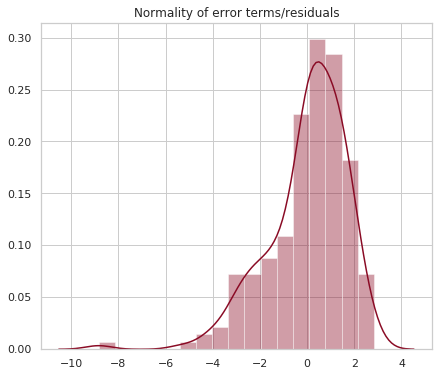

In [11]:
p = sns.distplot(residuals, kde=True)
p = plt.title('Normality of error terms/residuals')

> The residual terms are normally distributed for the number of test points we took. Remember the central limit theorem which says that as the sample size increases the distribution tends to be normal.

> **We can investigate the normality of residuals with a Q-Q (quantile-quantile) plot.**

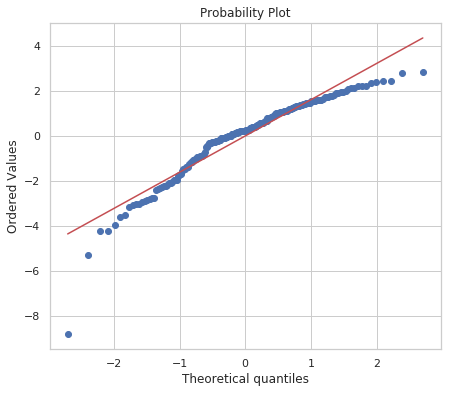

In [12]:
stats.probplot(residuals, dist="norm", plot=plt);

When residuals are normally distributed, they tend to lie along the straight line on the Q-Q plot. 
- In this case residuals appear to follow a slightly non-linear pattern: the residuals are bowed a bit away from the normality line on each end. 
- This is an indication that simple straight line might not be sufficient to fully describe the relationship between weight and mpg.

## <a id="auto">4. No autocorrelation of residuals</a>


When the residuals are autocorrelated, it means that the current value is dependent of the previous (historic) values.
- Autocorrelation suggests that there is some underlying pattern or structure in the data that is not captured by the regression model. 
- It indicates that the errors are not random and contain information that is not accounted for in the model.
- This is usual in time series data as there is a pattern of time.

> This section (autocorrelation of residuals) is optional we will study it in time series ISA

Text(0.5, 1.0, 'Residuals vs fitted values plot for autocorrelation check')

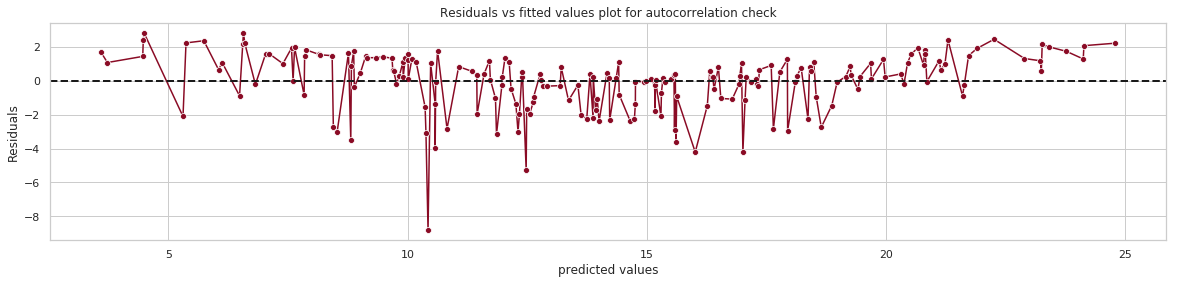

In [13]:
plt.figure(figsize=(20,4))
sns.lineplot(y_preds,residuals,marker='o')
plt.xlabel('predicted values')
plt.ylabel('Residuals')
plt.axhline(0, color='k', linestyle='--', linewidth=2) 
plt.title('Residuals vs fitted values plot for autocorrelation check')

### a) Ljung-Box Test:
The Ljung-Box test is used to test whether any autocorrelation exists in a time series. It examines whether a group of autocorrelations of a time series is different from zero.
- **Null Hypothesis**: Autocorrelation is absent.
- **Alternative Hypothesis**: Autocorrelation is present.

In [59]:
from statsmodels.stats.diagnostic import acorr_ljungbox

# Perform Ljung-Box test
_, p_value = acorr_ljungbox(residuals)

if min(p_value) < 0.05:
    print("Autocorrelation is present (reject null hypothesis)")
else:
    print("Autocorrelation is absent (fail to reject null hypothesis)")
print("P-value:", min(p_value))

Autocorrelation is absent (fail to reject null hypothesis)
P-value: 0.504176743284387


### b) Durbin-Watson Test
The Durbin-Watson test checks for autocorrelation in the residuals of a regression model.
- It produces a test statistic with a value between 0 and 4.
- Values around 2 indicate no autocorrelation, while values significantly below 2 indicate positive autocorrelation and values significantly above 2 indicate negative autocorrelation.

In [62]:
import statsmodels.api as sm
durbin_watson_statistic = sm.stats.stattools.durbin_watson(residuals)
print("Durbin-Watson Statistic:", durbin_watson_statistic)

Durbin-Watson Statistic: 2.083648405294408


## <a id="multico">5. No perfect multicollinearity</a>
- Multicollinearity affects the coefficients and p-values.
- It does not influence the predictions, precision of the predictions, and the goodness-of-fit statistics. 
- If your primary goal is to make predictions, and you don’t need to understand the role of each independent variable, you don’t need to reduce severe multicollinearity

### a) Using Preson's correlation with continous features

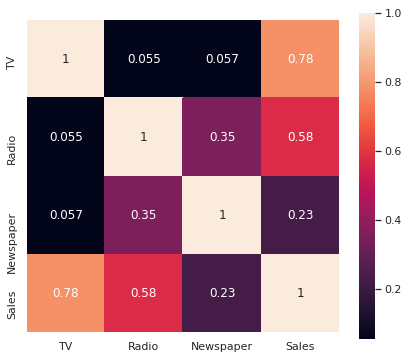

In [14]:
sns.heatmap(ad_data.corr(), annot=True,square=True);  # seaborn has very simple solution for heatmap

> **If we have categorical features we will ue chi-square for ot another suitable technique**

### b) Using Variance Inflation Factor(VIF)

In [40]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_data = pd.DataFrame()
vif_data['features'] = X.columns.values
vif_data["VIF"] = [variance_inflation_factor(X.iloc[:,:].values, i) for i in range(X.shape[1])]
vif_data

,features,VIF
0,TV,2.487
1,Radio,3.285
2,Newspaper,3.055


> **No multicolinearinty**

## <a id="hetro">6. Check for Heteroscedasticity</a>
Heteroscedasticity means that the vaiance of the error is not constant while Homoscedasticity means that the residuals have equal or almost equal variance across the regression line. 

### a) Residual plot
By plotting the error terms with predicted terms we can check that there should not be any pattern in the error terms.


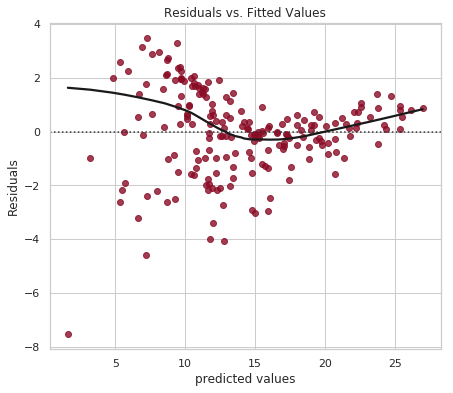

In [32]:
# Calculate residuals
residuals = y - y_preds

sns.residplot(x=y, y=residuals, lowess=True, line_kws={'color': 'k'})
plt.xlabel('predicted values')
plt.ylabel('Residuals')
plt.title('Residuals vs. Fitted Values')
plt.show()


In [33]:
# # Another method to plot residuals
# plt.errorbar(y_preds, residuals, fmt='o',alpha=0.6,label="Variance")
# plt.scatter(y_preds, residuals, color='k', label="Ground Truth")
# plt.legend()

In [34]:
# # Another way to plot residual 
# sns.scatterplot(x = y_preds , y = residuals)
# plt.xlabel('predicted values')
# plt.ylabel('Residuals')
# plt.axhline(0, color='k', linestyle='--', linewidth=2)  # Add a horizontal line at zero

### b) Breusch-Pagan Test
The Breusch-Pagan test is used to determine whether the variance of the errors in a regression model is constant (homoscedasticity) or varies systematically with the independent variables (heteroscedasticity).

- **Null hypothesis:** The variance of the errors is constant (homoscedasticity).
- **Alternative hypothesis:** The variance of the errors is not constant (heteroscedasticity).

- **Procedure:**
    1. Fit a regression model and obtain the residuals.
    2. regress the residuals square with the independent variables.
    3. Calcaulate the R-square.
    4. Calculate the test statistic by multiplying the number of observation and R-square (n*r2).
    5. Obtain the p-value associated with the test statistic.
- **Decision:**
    - If the null hypothesis is **rejected (pvalue < alpha)**, it implies that the model suffers from **heteroscedasticity**.
    - If the null hypothesis is **not rejected (pvalue > alpha)**, it suggests that the model satisfies the assumption of **homoscedasticity**.

In [40]:
from statsmodels.stats.diagnostic import het_breuschpagan

names = ['lm', 'lm_pvalue', 'fvalue', 'f_pvalue']
results = het_breuschpagan(resid=residuals, exog_het=X)
print(lzip(names, results), '\n')

if results[1] < 0.05:
    print("Heteroscedasticity detected (reject null hypothesis)")
else:
    print("No heteroscedasticity detected (fail to reject null hypothesis)")

[('lm', 25.033579588067113), ('lm_pvalue', 3.664605771994266e-06), ('fvalue', 9.395355534009424), ('f_pvalue', 7.828453271745514e-06)] 

Heteroscedasticity detected (reject null hypothesis)


### c) White Test
It's an extension of the Breusch-Pagan test and can handle more complex forms of heteroscedasticity. but we regress squared residuals with the square and cross-products of the independent variables.

In [ ]:
from statsmodels.stats.diagnostic import het_white

results = het_white(residuals, X)
print(lzip(names, results), '\n')

if results[1] < 0.05:
    print("Heteroscedasticity detected (reject null hypothesis)")
else:
    print("No heteroscedasticity detected (fail to reject null hypothesis)")

### d) Goldfeld-Quandt Test
- It tests whether the variance of the errors is the same in two or more groups defined by a splitting variable.

In [41]:
from statsmodels.stats.diagnostic import het_goldfeldquandt

# Perform Goldfeld-Quandt test
results = het_goldfeldquandt(residuals, X)
print(lzip(names, results), '\n')

if results[1] < 0.05:
    print("Heteroscedasticity detected (reject null hypothesis)")
else:
    print("No heteroscedasticity detected (fail to reject null hypothesis)")


[('lm', 1.3444110321318345), ('lm_pvalue', 0.07338571632410308), ('fvalue', 'increasing')] 

No heteroscedasticity detected (fail to reject null hypothesis)


### e) Park Test

In [ ]:
from arch.stats import het_arch

# Perform Park test
results = het_arch(residuals, X)
print(lzip(names, results), '\n')

if p_value < 0.05:
    print("Heteroscedasticity detected (reject null hypothesis)")
else:
    print("No heteroscedasticity detected (fail to reject null hypothesis)")
